# Question 14

We know that the magnitude of the force applied by a differential area located at (x,y,z) of the plate is given by:
$$dF= \frac{G\sigma m}{(\sqrt{x^2+y^2+z^2})^2}dxdy$$
where m=1, the mass of the point mass.
But when we integrate only for the z component then we must consider {magnitude x cos(angle)}, where angle is the angle between z axis and the line joining the mass and the differential area. Clearly $cos\theta=\frac{z}{\sqrt{x^2+y^2+z^2}}$
So,
$$dF_{eff}=dFcos\theta=\frac{G\sigma z}{(x^2+y^2+z^2)^{\frac{3}{2}}}$$
$$\implies F= \int dF_{eff}=\int\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{G\sigma z}{(x^2+y^2+z^2)^{\frac{3}{2}}}dxdy$$

Text(0.5, 1.0, 'variation of z-force w.r.t z')

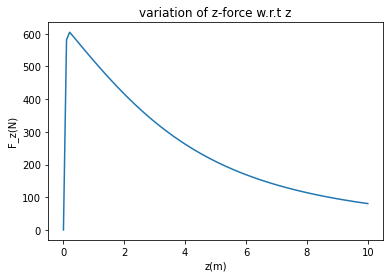

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def f(x,y,z):
    G=6.674e-11
    return ((z)/((x**2+y**2+z**2)**(3/2)))


def int_f(low, high, N, y, z):
    x,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i], y, z))
    return val

def int_int_f(low, high, N, z):
    y,w=gaussxwab(N, low, high)
    val=0
    for i in range(N):
        val+=(w[i])*(int_f(low, high, N, y[i], z))
    return val

def gravity_z(z):
    low=-5
    high=5
    N=100
    sigma=1e2
    return int_int_f(low, high, N, z)*sigma

z=np.linspace(0,10,100)
gravity=[]
for i in range(100):
    gravity.append(gravity_z(z[i]))
    
plt.plot(z,gravity)
plt.xlabel('z(m)')
plt.ylabel('F_z(N)')
plt.title('variation of z-force w.r.t z')

    
    

In reality, the force should go to a constant value as z approaches 0.
$$F(z) \approx k\int\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{z }{(x^2+y^2)^{\frac{3}{2}}}dxdy$$

Constant value means the gaussian quadrature assigned too less a weight to that region. This essentially means the integral was undercounted there. Other reason could be large rounding errors whlile diving a small value (Z), by the denominator.

The remedy is too see the previous graph and identify where the anomaly is starting to happen. Now, we have to use some other method of uniform interval taking and weight assigning like trapezoidal rule, simpson rule which will approximate that part better, for the other part we can use Gaussian quadrature and mix the two models later into a singe graph. On the otherhand we can approximate the expression analytically beforehand near z=0 regime to avoid unnecessary computational complications.
